In [9]:
!pip3 install opencv-python

In [10]:
def extract_sift_features(img):
    sift_initialize = cv2.xfeatures2d.SIFT_create()
    key_points, descriptors = sift_initialize.detectAndCompute(img, None)
    return key_points, descriptors
def showing_sift_features(img1, img2, key_points):
    return plt.imshow(cv2.drawKeypoints(img1, key_points, img2.copy()))

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [12]:
x = "image1.jpg"
Image1 = cv2.imread(x)
y = "image2.jpg"
Image2 = cv2.imread(y)

In [13]:
Image1_gray = cv2.cvtColor(Image1, cv2.COLOR_BGR2GRAY)
Image2_gray = cv2.cvtColor(Image2, cv2.COLOR_BGR2GRAY)

In [14]:
Image1_key_points, Image1_descriptors = extract_sift_features(Image1_gray)
Image2_key_points, Image2_descriptors = extract_sift_features(Image2_gray)

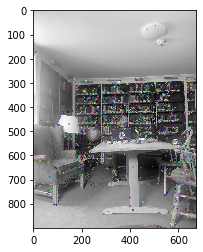

In [15]:
showing_sift_features(Image1_gray, Image1, Image1_key_points);

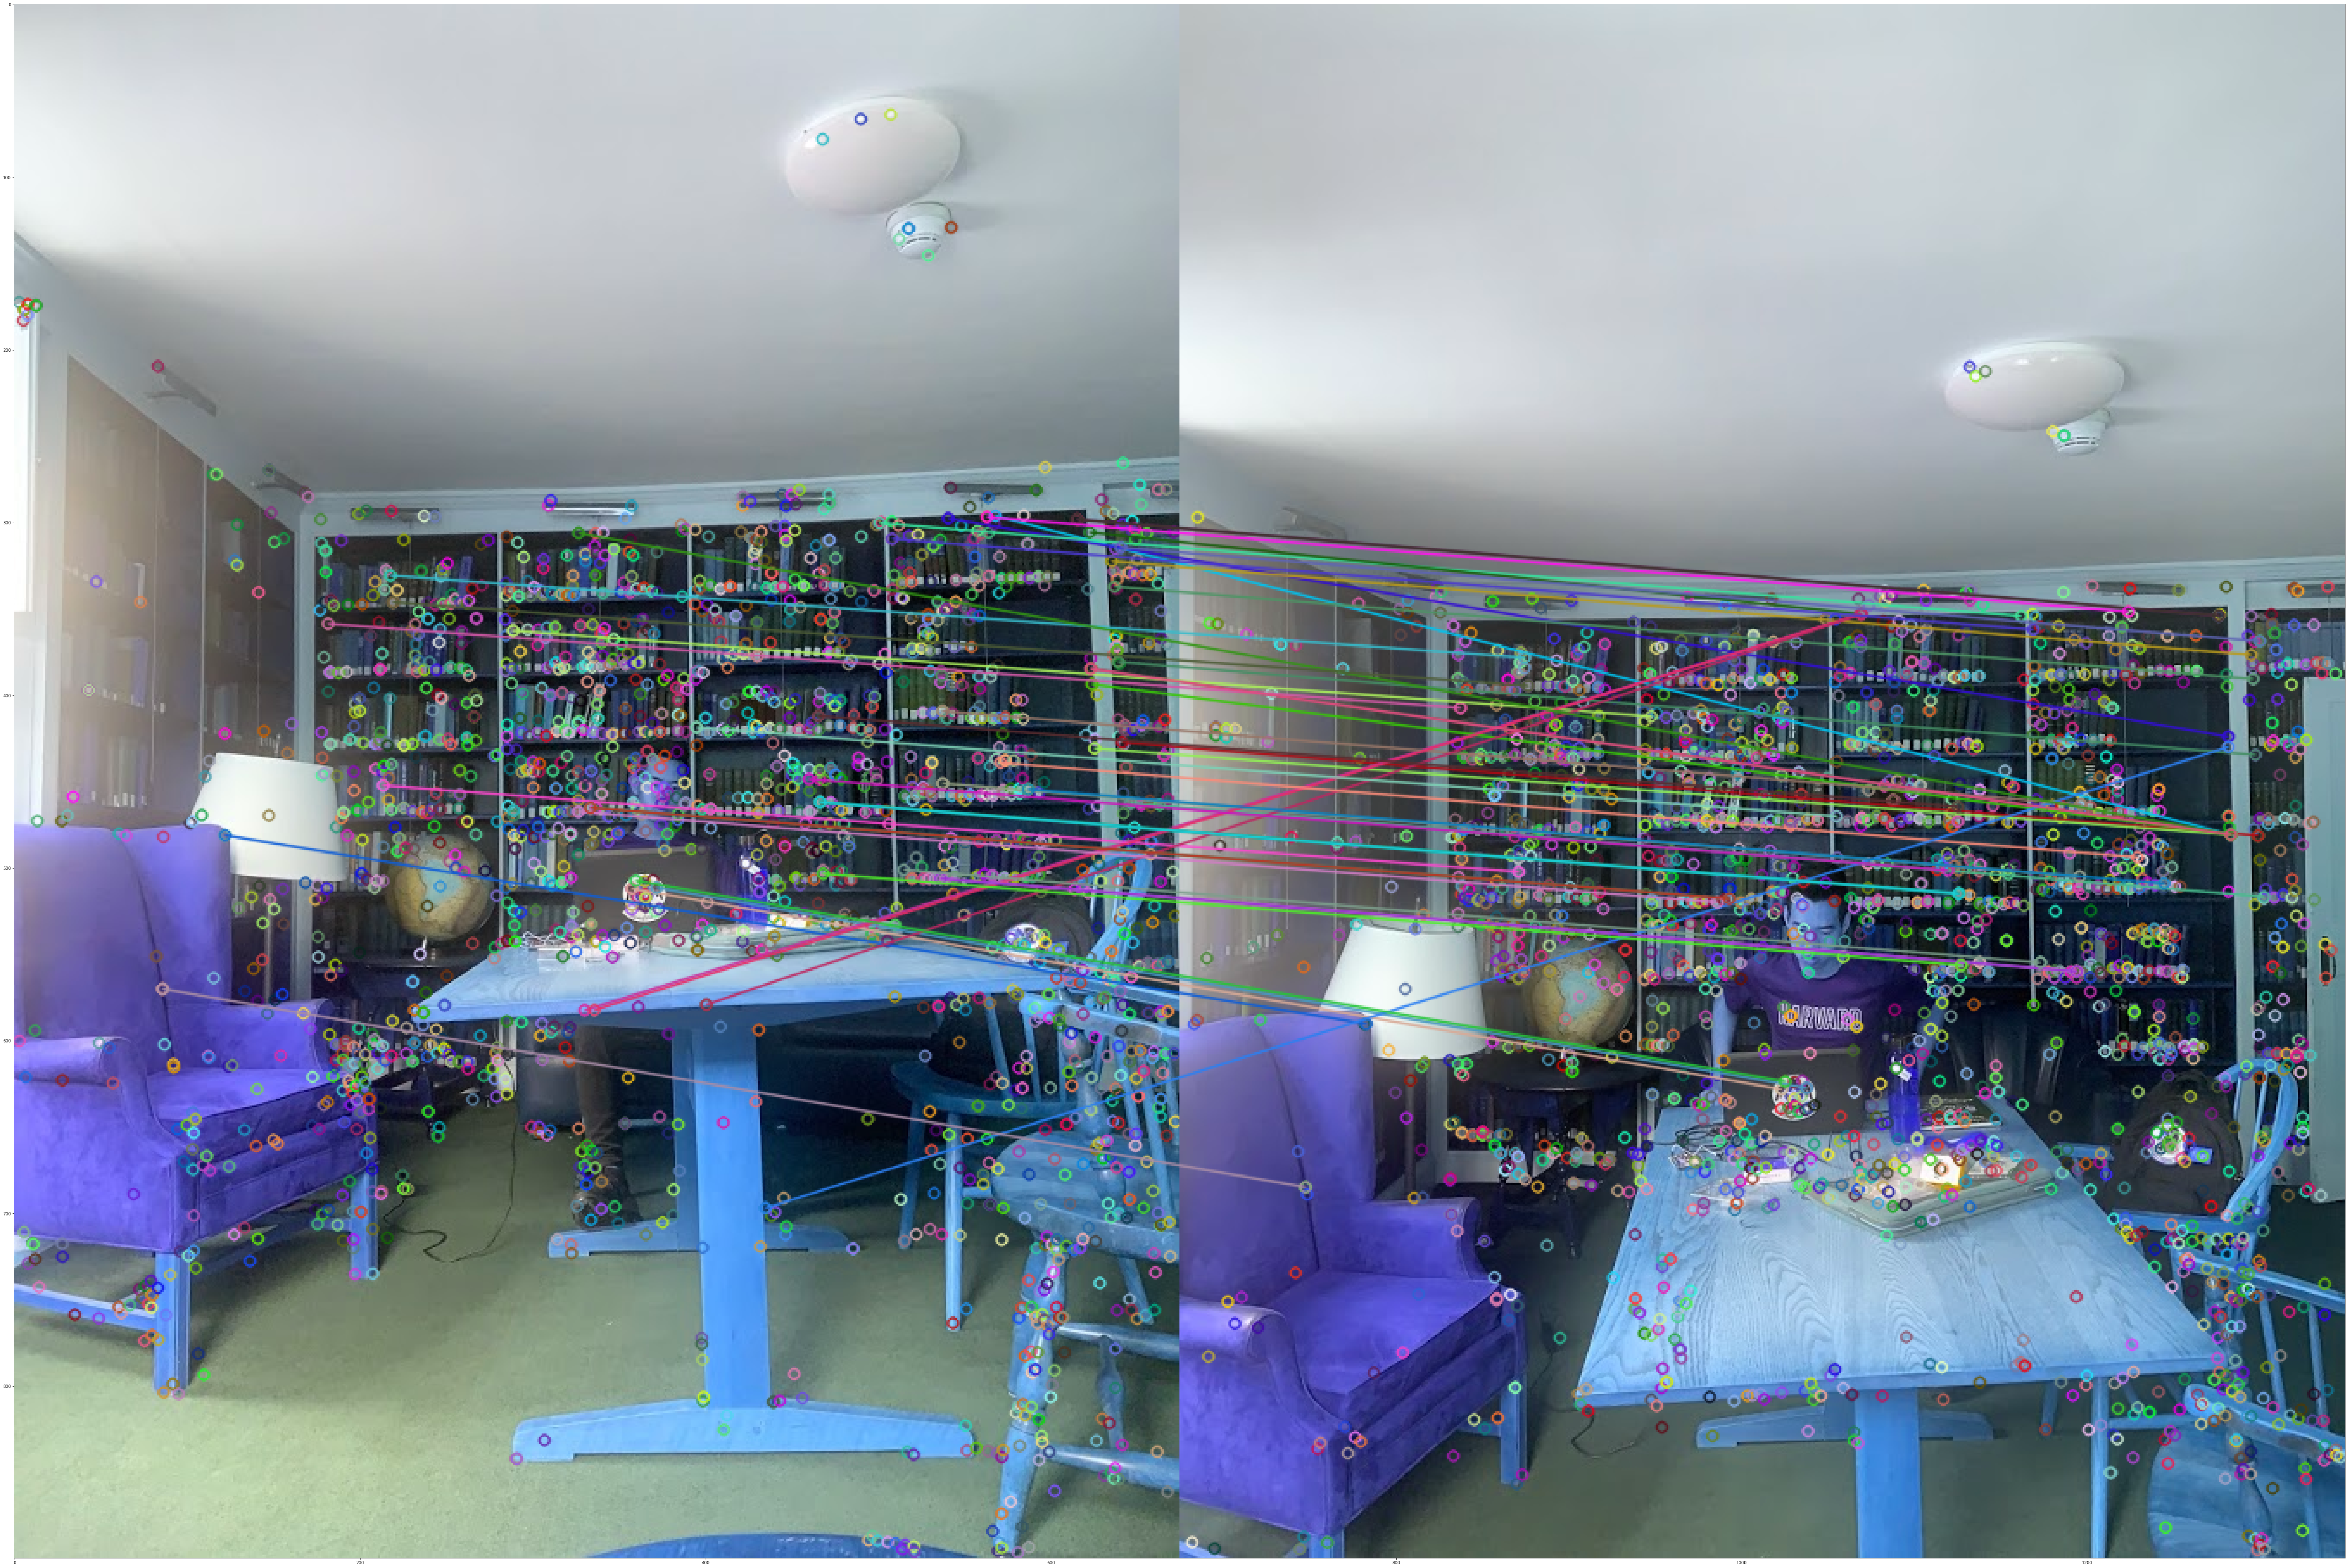

In [17]:
norm = cv2.NORM_L2
bruteForce = cv2.BFMatcher(norm)
matches = bruteForce.match(Image1_descriptors, Image2_descriptors)
matches = sorted(matches, key = lambda match:match.distance)
matched_img = cv2.drawMatches(
    Image1, Image1_key_points,
    Image2, Image2_key_points,
    matches[:50], Image2.copy())
plt.figure(figsize=(100,300))
plt.imshow(matched_img)